## What is Feature Engineering?

<span style="font-size:1.2em">Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. If feature engineering is done correctly, it increases the predictive power of machine learning algorithms by creating features from raw data that help facilitate the machine learning process. Feature Engineering is an art.</span>

## Feature Creation

### Read Data

In [9]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv('SMSSpamCollection.tsv',sep='\t',names=['label','body'])
data.head()

,label,body
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


### Create Feature for SMS Body Length

### Create feature for Punctuation Percent in SMS

In [8]:
import string
def punc_percent(text):
    punc = sum([1 for char in text if char in string.punctuation])
    punc_per = round(punc/(len(text) - text.count(' ')),3)*100
    return punc_per

data['punc%'] = data['body'].apply(lambda x:punc_percent(x))

data.head()

,label,body,len,punc%
0,ham,I've been searching for the right words to tha...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
3,ham,Even my brother is not like to speak with me. ...,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1


## Evaluate Created Features

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

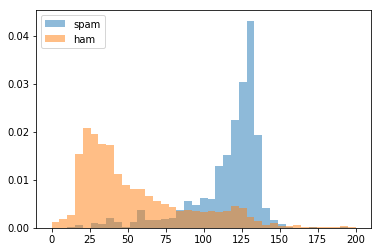

In [14]:
# Making Bins
# This Plot is for the Length of the SMS
bins = np.linspace(0,200,40)    # 0 - 200 with 40 bins

plt.hist(data[data['label']=='spam']['len'], bins, alpha=0.5, normed=True, label='spam')
plt.hist(data[data['label']=='ham']['len'], bins, alpha=0.5, normed = True, label='ham')
plt.legend(loc='upper left')
plt.show()

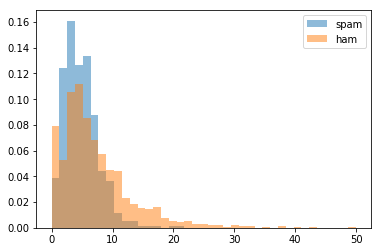

In [15]:
# Now plotting the punctuation% of the SMS

bins = np.linspace(0,50,40)

plt.hist(data[data['label']=='spam']['punc%'],bins,alpha=0.5,normed=True,label='spam')
plt.hist(data[data['label']=='ham']['punc%'],bins,alpha=0.5,normed=True,label='ham')
plt.legend(loc='upper right')
plt.show()

<span style="font-size:1.25em; font-family:'Times New Roman'">Here we can see that 'Spam' SMSes have longer length than the 'Ham' SMSes.
But there is not any significant differnce between the Punctuation % among these two. Looking at the Histogram we can see that 'Spam' SMSes tend to have lower punctuation%</span>

## Transformations

<span style="font-size:1.25em; font-family:'Times New Roman'">Covering steps taken to modify the data, data transformation is undertaken with the intention to enhance the ability of the classification algorithm to extract information from the data.</span>

### Plotting the new Features

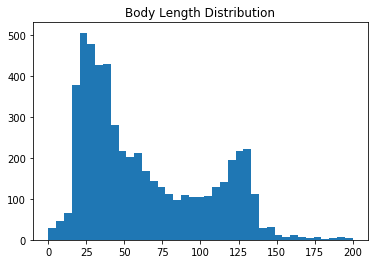

In [16]:
bins = np.linspace(0,200,40)

plt.hist(data['len'],bins)
plt.title('Body Length Distribution')
plt.show()

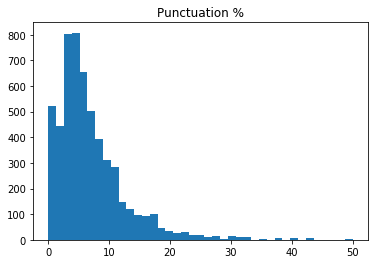

In [17]:
bins = np.linspace(0,50,40)

plt.hist(data['punc%'],bins)
plt.title('Punctuation %')
plt.show()

<span style="font-size:1.25em; font-family:'Times New Roman'"> Here we can see that the Punctuation% right skewed. So we will transform this distribution into a normal distribution so it becomes easier for our machine learning model to form insights using it.</span>

### Transform the punctuation % feature

### Box-Cox Power Transformation

**Base Form**: $$ y^x $$

| X    | Base Form           |           Transformation               |
|------|--------------------------|--------------------------|
| -2   | $$ y ^ {-2} $$           | $$ \frac{1}{y^2} $$      |
| -1   | $$ y ^ {-1} $$           | $$ \frac{1}{y} $$        |
| -0.5 | $$ y ^ {\frac{-1}{2}} $$ | $$ \frac{1}{\sqrt{y}} $$ |
| 0    | $$ y^{0} $$              | $$ log(y) $$             |
| 0.5  | $$ y ^ {\frac{1}{2}}  $$ | $$ \sqrt{y} $$           |
| 1    | $$ y^{1} $$              | $$ y $$                  |
| 2    | $$ y^{2} $$              | $$ y^2 $$                |


**Process**
1. Determine what range of exponents to test
2. Apply each transformation to each value of your chosen feature
3. Use some criteria to determine which of the transformations yield the best distribution

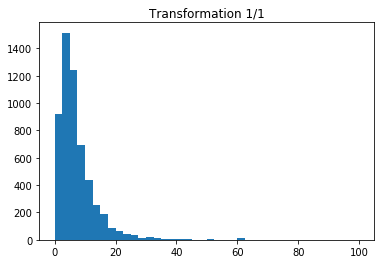

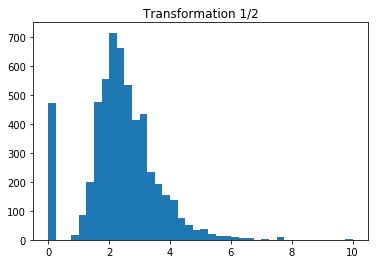

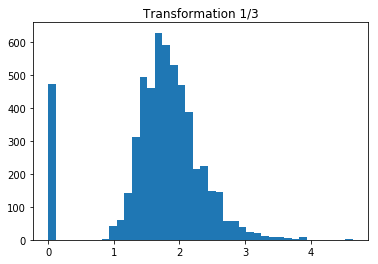

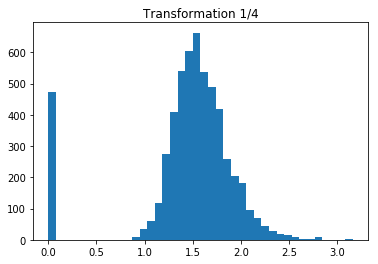

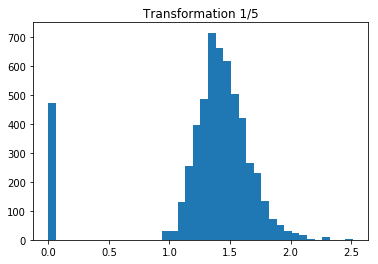

In [19]:
for i in [1,2,3,4,5]:
    plt.hist(data['punc%']**(1/i),bins=40)
    plt.title('Transformation 1/{}'.format(str(i)))
    plt.show()

<span style="font-size:1.25em; font-family:'Times New Roman'"> Here we can see that the most suitable transformations are Transformation 1/4 and 1/5. We can use either of these transformations when we build our machine leraning model.</span>